In [12]:
# video -> video+audio -> video nst + audio nst -> merge
from google.colab import drive
import os
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


In [0]:
%tensorflow_version 1.x
%matplotlib inline
import tensorflow as tf
import librosa
from IPython.display import Audio, display
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import sys
from moviepy.editor import *

video = VideoFileClip('./VERSION2/content.mp4')
audio = video.audio
audio.write_audiofile('./VERSION2/extracted_audio.mp3')

[MoviePy] Writing audio in ./VERSION2/extracted_audio.mp3


100%|██████████| 1277/1277 [00:02<00:00, 589.70it/s]

[MoviePy] Done.


In [15]:
# video nst

import cv2
import numpy as np
import os
cap = cv2.VideoCapture('./VERSION2/content.mp4')

currentFrame = 0
try:
  while True:
      ret, frame = cap.read()
      if not ret:
        break
      name = './VERSION2/' + str(currentFrame) + '.jpg'
      print ('Creating...' + name)
      cv2.imwrite(name, frame)
      currentFrame += 1
except:
  pass

cap.release()
cv2.destroyAllWindows()

Creating..../VERSION2/0.jpg
Creating..../VERSION2/1.jpg
Creating..../VERSION2/2.jpg
Creating..../VERSION2/3.jpg
Creating..../VERSION2/4.jpg
Creating..../VERSION2/5.jpg
Creating..../VERSION2/6.jpg
Creating..../VERSION2/7.jpg
Creating..../VERSION2/8.jpg
Creating..../VERSION2/9.jpg
Creating..../VERSION2/10.jpg
Creating..../VERSION2/11.jpg
Creating..../VERSION2/12.jpg
Creating..../VERSION2/13.jpg
Creating..../VERSION2/14.jpg
Creating..../VERSION2/15.jpg
Creating..../VERSION2/16.jpg
Creating..../VERSION2/17.jpg
Creating..../VERSION2/18.jpg
Creating..../VERSION2/19.jpg
Creating..../VERSION2/20.jpg
Creating..../VERSION2/21.jpg
Creating..../VERSION2/22.jpg
Creating..../VERSION2/23.jpg
Creating..../VERSION2/24.jpg
Creating..../VERSION2/25.jpg
Creating..../VERSION2/26.jpg
Creating..../VERSION2/27.jpg
Creating..../VERSION2/28.jpg
Creating..../VERSION2/29.jpg
Creating..../VERSION2/30.jpg
Creating..../VERSION2/31.jpg
Creating..../VERSION2/32.jpg
Creating..../VERSION2/33.jpg
Creating..../VERSION2/34

In [0]:
# apply dph
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import os
from keras import backend as K
from keras.preprocessing.image import load_img, save_img, img_to_array
import matplotlib.pyplot as plt
from keras.applications import vgg19
from keras.models import Model
from scipy.optimize import fmin_l_bfgs_b

In [0]:
style_image_path = "./VERSION2/Style/style.jpg"

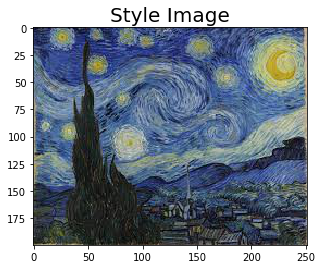

In [18]:
plt.figure()
plt.title("Style Image",fontsize=20)
img1 = load_img(style_image_path)
plt.imshow(img1)

In [0]:
import glob
img_array = [filepath for filepath in glob.glob('./VERSION2/*.jpg')]

In [20]:
img_array

['./VERSION2/style.jpg',
 './VERSION2/0.jpg',
 './VERSION2/1.jpg',
 './VERSION2/2.jpg',
 './VERSION2/3.jpg',
 './VERSION2/4.jpg',
 './VERSION2/5.jpg',
 './VERSION2/6.jpg',
 './VERSION2/7.jpg',
 './VERSION2/8.jpg',
 './VERSION2/9.jpg',
 './VERSION2/10.jpg',
 './VERSION2/11.jpg',
 './VERSION2/12.jpg',
 './VERSION2/13.jpg',
 './VERSION2/14.jpg',
 './VERSION2/15.jpg',
 './VERSION2/16.jpg',
 './VERSION2/17.jpg',
 './VERSION2/18.jpg',
 './VERSION2/19.jpg',
 './VERSION2/20.jpg',
 './VERSION2/21.jpg',
 './VERSION2/22.jpg',
 './VERSION2/23.jpg',
 './VERSION2/24.jpg',
 './VERSION2/25.jpg',
 './VERSION2/26.jpg',
 './VERSION2/27.jpg',
 './VERSION2/28.jpg',
 './VERSION2/29.jpg',
 './VERSION2/30.jpg',
 './VERSION2/31.jpg',
 './VERSION2/32.jpg',
 './VERSION2/33.jpg',
 './VERSION2/34.jpg',
 './VERSION2/35.jpg',
 './VERSION2/36.jpg',
 './VERSION2/37.jpg',
 './VERSION2/38.jpg',
 './VERSION2/39.jpg',
 './VERSION2/40.jpg',
 './VERSION2/41.jpg',
 './VERSION2/42.jpg',
 './VERSION2/43.jpg',
 './VERSION2/44.j

In [0]:
width, height = load_img("./VERSION2/0.jpg").size
img_nrows = 100
img_ncols = int(width*img_nrows/height)

In [0]:
def preprocess_image(image_path):
    from keras.applications import vgg19
    img = load_img(image_path, target_size=(img_nrows, img_ncols))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

In [0]:
if not os.path.exists("./VERSION2/AppliedNST"):
  os.mkdir("./VERSION2/AppliedNST")

In [0]:
from keras.applications.vgg19 import VGG19
style_reference_image = K.variable(preprocess_image(style_image_path))

In [25]:
os.getcwd()

'/content/drive/My Drive'

In [26]:
os.path.exists('VERSION2')

True





80142336/80134624 [==============================] - 2s 0us/step






Model loaded.
Tensor("block4_conv2/Relu:0", shape=(3, 12, 22, 512), dtype=float32)
Layer Feature for Content Layers :: Tensor("block4_conv2/Relu:0", shape=(3, 12, 22, 512), dtype=float32)
Base Image Feature :: Tensor("strided_slice:0", shape=(12, 22, 512), dtype=float32)
Combination Image Feature for Content Layers:: Tensor("strided_slice_1:0", shape=(12, 22, 512), dtype=float32)

Layer Feature for Style Layers :: Tensor("block1_conv1/Relu:0", shape=(3, 100, 177, 64), dtype=float32)
Style Image Feature :: Tensor("strided_slice_2:0", shape=(100, 177, 64), dtype=float32)
Combination Image Feature for Style Layers:: Tensor("strided_slice_3:0", shape=(100, 177, 64), dtype=float32)

Layer Feature for Style Layers :: Tensor("block2_conv1/Relu:0", shape=(3, 50, 88, 128), dtype=float32)
Style Image Feature :: Tensor("strided_slice_6:0", shape=(50, 88, 128), dtype=float32)
Combination Image Feature for Style Layers:: Ten

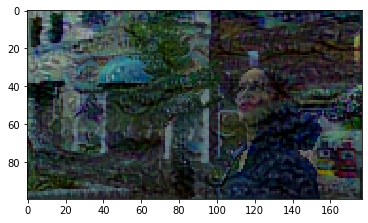

In [27]:
try:
  count=0
  for base_image_path in img_array:
    # get tensor representations of our images
    base_image = K.variable(preprocess_image(base_image_path))
    # this will contain our generated image
    if K.image_data_format() == 'channels_first':
        combination_image = K.placeholder((1,3,img_nrows, img_ncols))
    else:
        combination_image = K.placeholder((1,img_nrows, img_ncols,3))
    # combine the 3 images into a single Keras tensor
    input_tensor = K.concatenate([base_image,
                                  style_reference_image,
                                  combination_image
                                  ], axis=0)
    # build the VGG19 network with our 3 images as input
    # the model will be loaded with pre-trained ImageNet weights
    vgg19_weights = '../input/vgg19/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'
    model = VGG19(input_tensor=input_tensor,
                  include_top = False,
                  weights='imagenet')
    #model = vgg19.VGG19(input_tensor=input_tensor,
    #                    weights='imagenet', include_top=False)
    print('Model loaded.')
    # Content layer where will pull our feature maps
    content_layers = ['block4_conv2'] 

    # Style layer we are interested in
    style_layers = ['block1_conv1',
                    'block2_conv1',
                    'block3_conv1', 
                    'block4_conv1',
                    'block5_conv1'
                  ]

    num_content_layers = len(content_layers)
    num_style_layers = len(style_layers)
    outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])
    print(outputs_dict['block4_conv2'])
    # an auxiliary loss function
    # designed to maintain the "content" of the
    # base image in the generated image
    def get_content_loss(base_content, target):
        return K.sum(K.square(target - base_content))
    import tensorflow as tf
    # the gram matrix of an image tensor (feature-wise outer product)
    def gram_matrix(input_tensor):
        assert K.ndim(input_tensor)==3
        #if K.image_data_format() == 'channels_first':
        #    features = K.batch_flatten(input_tensor)
        #else:
        #    features = K.batch_flatten(K.permute_dimensions(input_tensor,(2,0,1)))
        #gram = K.dot(features, K.transpose(features))
        channels = int(input_tensor.shape[-1])
        a = tf.reshape(input_tensor, [-1, channels])
        n = tf.shape(a)[0]
        gram = tf.matmul(a, a, transpose_a=True)
        return gram#/tf.cast(n, tf.float32)

    def get_style_loss(style, combination):
        assert K.ndim(style) == 3
        assert K.ndim(combination) == 3
        S = gram_matrix(style)
        C = gram_matrix(combination)
        channels = 3
        size = img_nrows*img_ncols
        return K.sum(K.square(S - C))                       #/(4.0 * (channels ** 2) * (size ** 2))
    content_weight=0.025 
    style_weight=1.0
    # combine these loss functions into a single scalar
    loss = K.variable(0.0)
    layer_features = outputs_dict['block4_conv2']
    base_image_features = layer_features[0, :, :, :]
    combination_features = layer_features[2, :, :, :]
    print('Layer Feature for Content Layers :: '+str(layer_features))
    print('Base Image Feature :: '+str(base_image_features))
    print('Combination Image Feature for Content Layers:: '+str(combination_features)+'\n')
    loss += content_weight * get_content_loss(base_image_features,
                                          combination_features)

    feature_layers = ['block1_conv1', 'block2_conv1',
                      'block3_conv1', 'block4_conv1',
                      'block5_conv1']
    for layer_name in feature_layers:
        layer_features = outputs_dict[layer_name]
        style_reference_features = layer_features[1, :, :, :]
        combination_features = layer_features[2, :, :, :]
        print('Layer Feature for Style Layers :: '+str(layer_features))
        print('Style Image Feature :: '+str(style_reference_features))
        print('Combination Image Feature for Style Layers:: '+str(combination_features)+'\n')
        sl = get_style_loss(style_reference_features, combination_features)
        loss += (style_weight / len(feature_layers)) * sl
    def deprocess_image(x):
        if K.image_data_format() == 'channels_first':
            x = x.reshape((3, img_nrows, img_ncols))
            x = x.transpose((1, 2, 0))
        else:
            x = x.reshape((img_nrows, img_ncols, 3))
        # Remove zero-center by mean pixel
        x[:, :, 0] += 103.939
        x[:, :, 1] += 116.779
        x[:, :, 2] += 123.68
        # 'BGR'->'RGB'
        x = x[:, :, ::-1]
        x = np.clip(x, 0, 255).astype('uint8')
        return x
    grads = K.gradients(loss, combination_image)
    outputs = [loss]
    if isinstance(grads, (list,tuple)):
        outputs += grads
    else:
        outputs.append(grads)
    f_outputs = K.function([combination_image], outputs)
    # run scipy-based optimization (L-BFGS) over the pixels of the generated image
    # so as to minimize the neural style loss
    x_opt = preprocess_image(base_image_path)
    def eval_loss_and_grads(x):
        if K.image_data_format() == 'channels_first':
            x = x.reshape((1, 3, img_nrows, img_ncols))
        else:
            x = x.reshape((1, img_nrows, img_ncols, 3))
        outs = f_outputs([x])
        loss_value = outs[0]
        if len(outs[1:]) == 1:
            grad_values = outs[1].flatten().astype('float64')
        else:
            grad_values = np.array(outs[1:]).flatten().astype('float64')
        return loss_value, grad_values
    class Evaluator(object):

        def __init__(self):
            self.loss_value = None
            self.grads_values = None

        def loss(self, x):
            assert self.loss_value is None
            loss_value, grad_values = eval_loss_and_grads(x)
            self.loss_value = loss_value
            self.grad_values = grad_values
            return self.loss_value

        def grads(self, x):
            assert self.loss_value is not None
            grad_values = np.copy(self.grad_values)
            self.loss_value = None
            self.grad_values = None
            return grad_values
    evaluator = Evaluator()

    # ideally 400 iter
    # but takes huge time (~30 min for 5 iter!!)
    iterations=1
    # Store our best result
    best_loss, best_img = float('inf'), None
    for i in range(iterations):
        print('Start of iteration', i)
        x_opt, min_val, info= fmin_l_bfgs_b(evaluator.loss, 
                                            x_opt.flatten(), 
                                            fprime=evaluator.grads,
                                            maxfun=20,
                                            disp=True,
                                          )
        print('Current loss value:', min_val)
        if min_val < best_loss:
            # Update best loss and best image from total loss. 
            best_loss = min_val
            best_img = x_opt.copy()
            # save current generated image
            imgx = deprocess_image(best_img.copy())
            plt.imshow(imgx)
            if i==iterations-1:
              plt.savefig("./VERSION2/AppliedNST/"+str(count)+".jpg") 
              print("Written to "+os.getcwd()+"/VERSION2/AppliedNST/"+str(count)+".jpg")
              count+=1
              print("---------------------------------------\n")
except:
  pass

In [0]:
# stitch back to video
img_array = []
for filename in glob.glob('./VERSION2/AppliedNST/*.jpg'):
  img = cv2.imread(filename)
  height, width, layers = img.shape
  size = (width,height)
  img_array.append(img)
if not os.path.exists("./VERSION2/AppliedNSTVideo"):
  os.mkdir("./VERSION2/AppliedNSTVideo")
out = cv2.VideoWriter('./VERSION2/AppliedNSTVideo/output.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
  out.write(img_array[i])
out.release()